In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import bisect
import matplotlib.pyplot as plt

In [2]:
# Parâmetros do sistema de Lorenz
sigma, rho, beta = 10, 28, 8/3

# Sistema de Lorenz, F(x)
def F(s, t):
    x, y, z = s
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Jacobiana do Lorenz
def DF(s):
    x, y, z = s
    return np.array([
        [-sigma, sigma, 0],
        [rho - z, -1, -x],
        [y, x, -beta]
    ])

In [3]:
# Jacobiana do acoplamento
def DH(s):
    x, y, z = s
    return np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 0, 0]
])

In [4]:
def MSF(r, t_span=(0, 10**3), dt=0.001):
    t = np.arange(t_span[0], t_span[1], dt)
    s0 = [1.0, 1.0, 1.0]  # Condição inicial
    s_t = odeint(F, s0, t) # Solução numérica do sistema não acoplado usando odeint
    
    xi = np.random.rand(3) # Vetor de perturbação inicial aleatório
    xi /= np.linalg.norm(xi) # Normalização
    LE = 0.0 # Acumulador para o expoente de Lyapunov
    
    for i in range(1, len(t)):
        J = DF(s_t[i]) - r * DH(s_t[i]) # Jacobiano variacional
        xi = np.dot(np.eye(3) + dt * J, xi) # Evolução linear da perturbação (Euler)
        xi_norm = np.linalg.norm(xi) # Norma da perturbação
        LE += np.log(xi_norm) # Contribuição ao expoente
        xi /= xi_norm # Renormalização
    
    return LE / (len(t) * dt) # Média temporal

In [5]:
# Intervalo de r = sigma * lambda_k
r_values = np.linspace(0, 100, 8*(10**2))
LE_values = [MSF(r) for r in r_values]

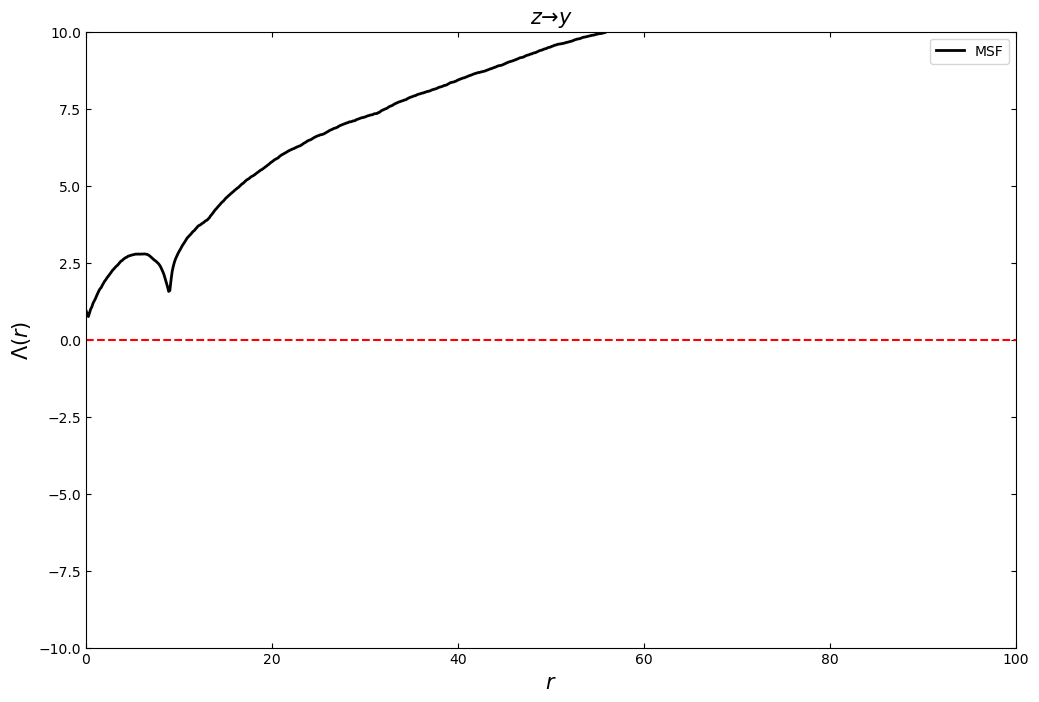

In [6]:
# Plotar MSF
plt.figure(figsize=(12, 8))
plt.plot(r_values, LE_values, 'k', linewidth=2, label='MSF')
plt.axhline(0, color='r', linestyle='--')
plt.xlim(0, 100)
plt.ylim(-10, 10)
plt.xlabel(r'$r$', fontsize=15)
plt.ylabel(r'$\Lambda(r)$', fontsize=15)
plt.title(r'$z \to y$', fontsize=15)
plt.legend()
plt.grid(False)
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.show()

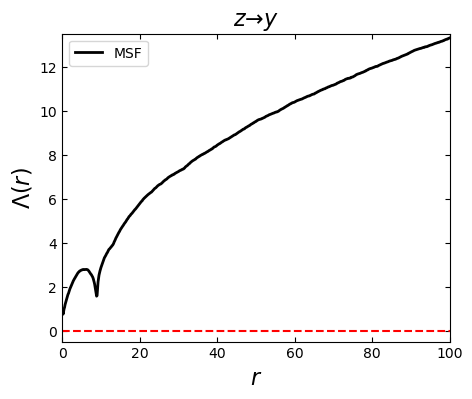

In [17]:
# Gera o novo gráfico da MSF com os pontos onde MSF = 0
fig32=plt.figure(figsize=(5, 4)) 
plt.plot(r_values, LE_values, 'k', linewidth=2, label='MSF')
plt.axhline(0, color='r', linestyle='--')
plt.xlim(0, 100)
plt.ylim(-0.5, 13.5)
plt.xlabel(r'$r$', fontsize=16)
plt.ylabel(r'$\Lambda(r)$', fontsize=16)
plt.title(r'$z \to y$', fontsize=16)
plt.legend()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.grid(False)
fig32.savefig('zy.pdf', format='pdf', dpi=300)
plt.show()